In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from pandas_profiling import ProfileReport
#import etsy_py
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis

# Data Loading and Cleaning

In [2]:
testdf = pd.read_csv("C:/Users/MMS-012/Documents/GitHub/softwarePricing/test_results.csv", parse_dates=['timestamp'])
testdf

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0
...,...,...,...,...,...,...,...,...,...
316795,316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39.0,0
316796,316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39.0,0
316797,316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39.0,0
316798,316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39.0,0


In [3]:
testdf.describe()

,Unnamed: 0,user_id,test,price,converted
count,316800.000000,316800.000000,316800.000000,3.168000e+05,316800.000000
mean,158399.500000,499281.341840,0.360079,6.457590e+06,0.018333
std,91452.426977,288591.154044,0.480024,6.797307e+07,0.134154
min,0.000000,3.000000,0.000000,3.900000e+01,0.000000
25%,79199.750000,249525.750000,0.000000,3.900000e+01,0.000000
50%,158399.500000,499021.500000,0.000000,3.900000e+01,0.000000
75%,237599.250000,749025.500000,1.000000,5.900000e+01,0.000000
max,316799.000000,1000000.000000,1.000000,9.998843e+08,1.000000


In [4]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        316800 non-null  int64  
 1   user_id           316800 non-null  int64  
 2   timestamp         316466 non-null  object 
 3   source            316488 non-null  object 
 4   device            316800 non-null  object 
 5   operative_system  296461 non-null  object 
 6   test              316800 non-null  int64  
 7   price             316800 non-null  float64
 8   converted         316800 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 21.8+ MB


In [5]:
testdf.isna().sum()

Unnamed: 0              0
user_id                 0
timestamp             334
source                312
device                  0
operative_system    20339
test                    0
price                   0
converted               0
dtype: int64

In [6]:
testdf.isna()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
316795,False,False,False,False,False,False,False,False,False
316796,False,False,False,False,False,False,False,False,False
316797,False,False,False,False,False,False,False,False,False
316798,False,False,False,False,False,False,False,False,False


In [7]:
(334/316800)*100, 312*100/316800 , (20339/316800)*100

(0.10542929292929294, 0.09848484848484848, 6.420138888888889)

In [8]:
testdf[testdf['timestamp'].isna()]

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
586,586,395390,NaN,ads_facebook,web,windows,0,39.0,0
986,986,306149,NaN,seo-google,mobile,iOS,0,39.0,0
2285,2285,750359,NaN,direct_traffic,mobile,iOS,1,59.0,0
2397,2397,712473,NaN,ads_other,mobile,android,0,39.0,0
2937,2937,76794,NaN,seo-other,mobile,iOS,0,39.0,0
...,...,...,...,...,...,...,...,...,...
315120,315120,716653,NaN,ads_facebook,web,windows,0,39.0,0
315244,315244,978020,NaN,ads-bing,mobile,android,0,39.0,0
315436,315436,893684,NaN,ads_other,web,windows,0,39.0,0
316027,316027,247915,NaN,ads-google,mobile,iOS,0,848064501.0,0


In [9]:
testdf = testdf[testdf['operative_system'].notna()]
testdf = testdf[testdf['timestamp'].notna()]
testdf = testdf[testdf['source'].notna()]

In [10]:
testdf.isna().sum()

Unnamed: 0          0
user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

### no more null values in test results

In [11]:
plot_OS_types = testdf.groupby('test')['operative_system'].apply(lambda s: s.value_counts(normalize=True)).unstack()
plot_OS_types

,windows,iOS,android,mac,i0S,wnddows,anroid,apple
test,,,,,,,,
0,0.334386,0.325148,0.253433,0.086000,0.000348,0.000311,0.000279,0.000095
1,0.350788,0.315449,0.250760,0.081854,0.000443,0.000367,0.000235,0.000104


### misspelled words! 

### don't really need a separate apple label if we have mac, so I rename it

In [12]:
testdf.replace("wnddows", "windows", inplace=True)
testdf.replace("i0S", "iOS", inplace=True)
testdf.replace("anroid", "android", inplace=True)
testdf.replace("apple", "mac", inplace=True)


In [13]:
plot_OS_types = testdf.groupby('test')['operative_system'].apply(lambda s: s.value_counts(normalize=True)).unstack()
plot_OS_types

,windows,iOS,android,mac
test,,,,
0,0.334697,0.325496,0.253712,0.086095
1,0.351155,0.315892,0.250996,0.081958


In [14]:
plot_device_types = testdf.groupby('test')['device'].apply(lambda s: s.value_counts(normalize=True)).unstack()
plot_device_types

,mobile,web
test,,
0,0.579208,0.420792
1,0.566887,0.433113


### moving on to the second table

In [15]:
userdf = pd.read_csv("C:/Users/MMS-012/Documents/GitHub/softwarePricing/user_table.csv")
userdf

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [16]:
userdf.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


In [17]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [18]:
userdf.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

### no null values. all the data types look sane! 

### Moving on to merging these tables together to get all the information

In [19]:
# check uniqueness
print('user_table:\t', userdf['user_id'].unique().shape)
print('test_results:\t', testdf['user_id'].unique().shape)

user_table:	 (275616,)
test_results:	 (295841,)


In [20]:
data = pd.merge(left=testdf, right=userdf, how='left', on='user_id')
data.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0,Buffalo,USA,42.89,-78.86
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0,Lakeville,USA,44.68,-93.24
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0,Parma,USA,41.38,-81.73
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0,Fayetteville,USA,35.07,-78.90
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0,Fishers,USA,39.95,-86.02


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295841 entries, 0 to 295840
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        295841 non-null  int64  
 1   user_id           295841 non-null  int64  
 2   timestamp         295841 non-null  object 
 3   source            295841 non-null  object 
 4   device            295841 non-null  object 
 5   operative_system  295841 non-null  object 
 6   test              295841 non-null  int64  
 7   price             295841 non-null  float64
 8   converted         295841 non-null  int64  
 9   city              257298 non-null  object 
 10  country           257298 non-null  object 
 11  lat               257298 non-null  float64
 12  long              257298 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 31.6+ MB


### 1. I suspect there could be errors with labelling
### 2. I see null values again

In [22]:
# Problem with the data: test and price not match
data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price               
0    39.0          187661
     59.0             187
     324680531.0        1
     325355094.0        1
     325373202.0        1
...                   ...
1    995723160.0        1
     996601770.0        1
     997796945.0        1
     998765098.0        1
     999762858.0        1

[2852 rows x 1 columns]

### price : the price the user sees. It should match test, SHOULD, but does not 

#### some are labelled as 0 but see price as 59, should see only 39 
#### some are labelled 0 and 1, but they do not see price as 39 or 59 -- but a huge random number that makes no sense

### these are 2852 rows, which form about 0.9% of the dataset, which is tiny and we have to drop these too, since we have no way of knowing what happened here. 

In [23]:

# only keep the valid data
data = data[((data['test']==0) & (data['price']==39)) | ((data['test']==1) & (data['price']==59))]
data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

,,user_id
test,price,
0,39.0,187661
1,59.0,105004


### everything looks good for labelling here

In [24]:
data.isnull().sum()

Unnamed: 0              0
user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                38131
country             38131
lat                 38131
long                38131
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292665 entries, 0 to 295840
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        292665 non-null  int64  
 1   user_id           292665 non-null  int64  
 2   timestamp         292665 non-null  object 
 3   source            292665 non-null  object 
 4   device            292665 non-null  object 
 5   operative_system  292665 non-null  object 
 6   test              292665 non-null  int64  
 7   price             292665 non-null  float64
 8   converted         292665 non-null  int64  
 9   city              254534 non-null  object 
 10  country           254534 non-null  object 
 11  lat               254534 non-null  float64
 12  long              254534 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 31.3+ MB


In [26]:
38131/292665

0.13028889686159945

### 13% of the data with null values again. 

In [27]:
data[data['city'].isna()]

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
6,6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39.0,0,NaN,NaN,NaN,NaN
12,12,425567,2015-04-24 10:09:04,ads_facebook,web,windows,0,39.0,0,NaN,NaN,NaN,NaN
21,21,899236,2015-05-03 02:31:06,seo_facebook,web,windows,0,39.0,0,NaN,NaN,NaN,NaN
37,38,307166,2015-05-30 13:47:15,seo_facebook,mobile,iOS,1,59.0,0,NaN,NaN,NaN,NaN
48,50,833445,2015-04-11 17:07:35,direct_traffic,mobile,iOS,0,39.0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295804,316763,622567,2015-04-09 21:54:09,direct_traffic,web,windows,0,39.0,0,NaN,NaN,NaN,NaN
295827,316786,300043,2015-03-07 11:24:16,ads-google,web,windows,0,39.0,0,NaN,NaN,NaN,NaN
295829,316788,590087,2015-03-13 11:30:09,ads_other,mobile,android,0,39.0,0,NaN,NaN,NaN,NaN
295833,316792,874512,2015-03-14 12:13:52,ads_facebook,web,windows,0,39.0,0,NaN,NaN,NaN,NaN


In [28]:
data = data[data['city'].notna()]
data[data['city'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254534 entries, 0 to 295840
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        254534 non-null  int64  
 1   user_id           254534 non-null  int64  
 2   timestamp         254534 non-null  object 
 3   source            254534 non-null  object 
 4   device            254534 non-null  object 
 5   operative_system  254534 non-null  object 
 6   test              254534 non-null  int64  
 7   price             254534 non-null  float64
 8   converted         254534 non-null  int64  
 9   city              254534 non-null  object 
 10  country           254534 non-null  object 
 11  lat               254534 non-null  float64
 12  long              254534 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 27.2+ MB


# Data Preprocessing

In [29]:
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import chi2
from scipy.stats import ttest_ind

## We have source, device, operative system as our predictors ( can also consider location in terms of city/country/lat/long and time stamp if that would matter. )

## is the test group really random? or does it depend on the these predictors? 
### this can be checked by calculating chi square and p values. 

In [30]:
X = data.copy()

del X['timestamp']
del X['city']
del X['country']
del X['lat']
del X['long']

# to use sklearn to check feature importance, we must convert string values to numbers
src_label_encoder = LabelEncoder()
dev_label_encoder = LabelEncoder()
os_label_encoder = LabelEncoder()
city_label_encoder = LabelEncoder()
country_label_encoder = LabelEncoder()

X["source"] = src_label_encoder.fit_transform(data.source)
X["device"] = dev_label_encoder.fit_transform(data.device)
X["operative_system"] = os_label_encoder.fit_transform(data.operative_system)

# data["city"] = city_label_encoder.fit_transform(data.city)
# data["country"] = country_label_encoder.fit_transform(data.country)

X.head()

,Unnamed: 0,user_id,source,device,operative_system,test,price,converted
0,0,604839,3,0,1,0,39.0,0
1,1,624057,8,0,0,0,39.0,0
2,2,317970,0,0,0,0,39.0,0
3,3,685636,5,0,1,1,59.0,0
4,4,820854,3,1,2,0,39.0,0


In [31]:
# Visualization of scatterplots comparing different variables
# sns.pairplot(data.iloc[:,1:], palette='husl')
# plt.show()

In [32]:
colnames = ["source","device","operative_system"]

chi2values, pvalues = chi2(X.loc[:,colnames], X["test"])

pd.DataFrame({'chi2_value':chi2values,'pvalue':pvalues},index = colnames).sort_values(by='pvalue')

,chi2_value,pvalue
operative_system,38.567192,5.290072e-10
device,19.974446,7.848408e-06
source,6.965775,8.308344e-03


### from above result, we know that the splitting between test/control groups isn't random. OS, device and source have great impact on the split (with alpha 0.05)

### with alpha 0.01 or 0.001, atleast device and operative system have a great impact on the splitting. 

In [33]:
os_test_ctrl_dist = data.groupby('test')['operative_system'].apply(lambda s: s.value_counts(normalize=False)).unstack()
os_test_ctrl_dist

,windows,iOS,android,mac
test,,,,
0,54525,53079,41511,14110
1,32055,28822,22993,7439


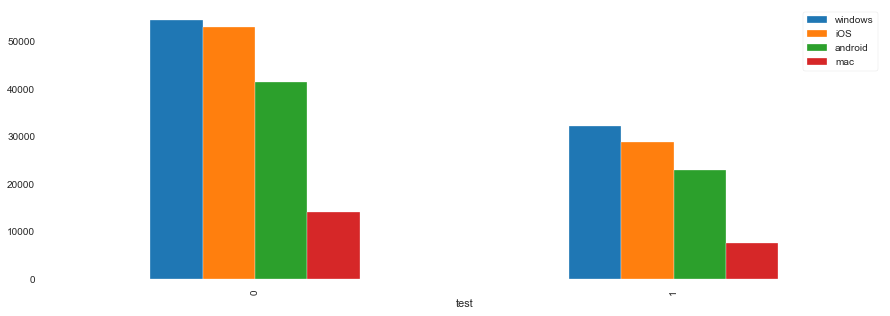

In [34]:
os_test_ctrl_dist.plot(kind='bar',figsize=(15,5))

### we can see that OS distribution in test/control groups are very different.

### the experiment claim that '66% of the users have seen the old price (39), while a random sample of 33% users a higher price (59)'

### 65.4% of mac,  64.4% of android, 64.8% of iOS, and 62.9% of windows go to control group. 

In [35]:
device_test_ctrl_dist = data.groupby('test')['device'].apply(lambda s: s.value_counts(normalize=False)).unstack()
device_test_ctrl_dist

,mobile,web
test,,
0,94590,68635
1,51815,39494


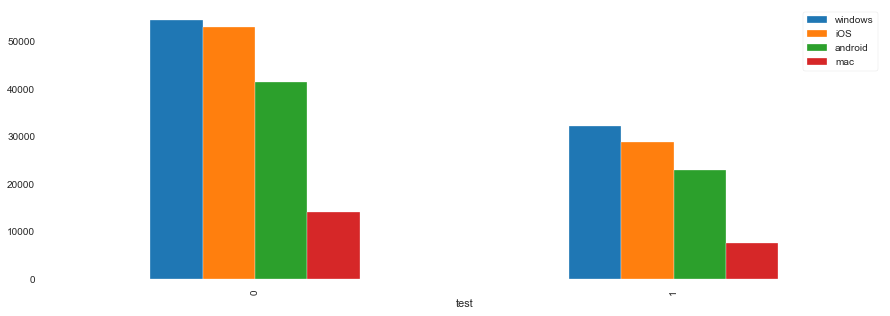

In [36]:
os_test_ctrl_dist.plot(kind='bar',figsize=(15,5))

### the device distribution is also not the same. 

### 63.4% of web and 64.6% of mobile belong to the control group, 

# Question 1 

## Should the company sell its software for 39 or 59 dollars? 

### Lets look at the revenue earned till now

In [37]:
#revenue is the money earned
# create new column called `revenue`
data['revenue'] = data['converted'] * data['price']

In [38]:

def group_statistics(df):
    return pd.Series({'n_users': df.shape[0],
                      'convert_rate': df.converted.mean(), 
                      'mean_revenue': (df.price * df.converted).mean()})
data.groupby('test').apply(group_statistics)

,n_users,convert_rate,mean_revenue
test,,,
0,163225.0,0.020187,0.787287
1,91309.0,0.016044,0.946621


In [39]:
# check the revenue for A/B test
# data[['test', 'revenue']].groupby('test').mean()

### the conversion rate is higher among the control group with 39 dollars price at 2.02% and those with higher price, the coversion rate comes quite close at 1.6%. 

### the revenue of the test group looks higher, since the price of 59 dollars is also higher. 

### we perform a t-test to test whether the test group's average revenue is higher than control group's average revenue


H0: test group's average revenue equal to control group's average revenue

HA: test group's average revenue is higher than control group's average revenue

In [40]:
ctrl_vals = data[data['test'] == 0]['revenue'].values
test_vals = data[data['test'] == 1]['revenue'].values
print(ttest_ind(ctrl_vals, test_vals, axis=0, equal_var=False))

Ttest_indResult(statistic=-5.682608173501334, pvalue=1.329040602863141e-08)


#### since the p-value is much smaller than 0.05 threshold, so we reject H0, and accept HA, that is, test group's average revenue is significantly higher than control group's average revenue.

#### but since the OS and device distribution aren't the same between test/control groups, price isn't the only difference between test/control groups, 

#### the experiment design is not correct then, and it cannot be decided whether we can price at 59 dollars for all the users

#### I think that, 

 -- we need to find the reason for atleast why windows users have different representation ratio than other OS? 
 
 -- then complete the experiment again by making sure price is the only difference between test and control group
 
 -- and then do another t-test, to see whether the average revenue is significantly improved.

#### only then can I answer the question





# Question 2 


##  The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?


In [41]:
#look at the source of traffic

data.groupby('source')['converted'].mean().reset_index()

,source,converted
0,ads-bing,0.012504
1,ads-google,0.021874
2,ads-yahoo,0.014920
3,ads_facebook,0.021924
4,ads_other,0.014683
5,direct_traffic,0.012483
6,friend_referral,0.038706
7,seo-bing,0.022311
8,seo-google,0.017153
9,seo-other,0.016472


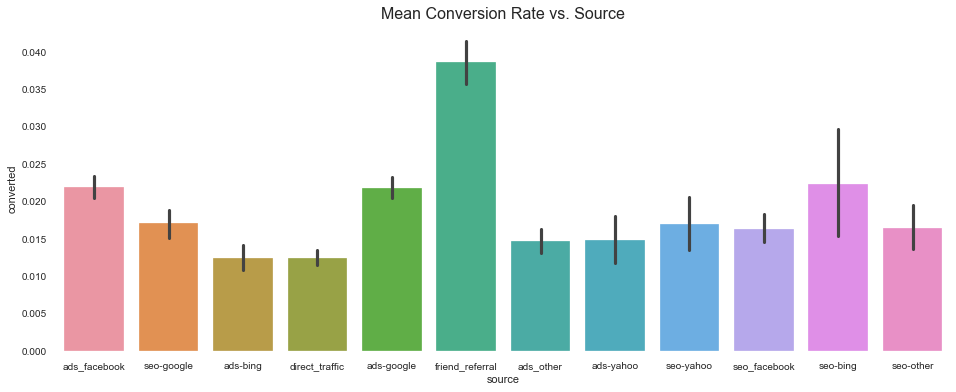

In [42]:
#Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

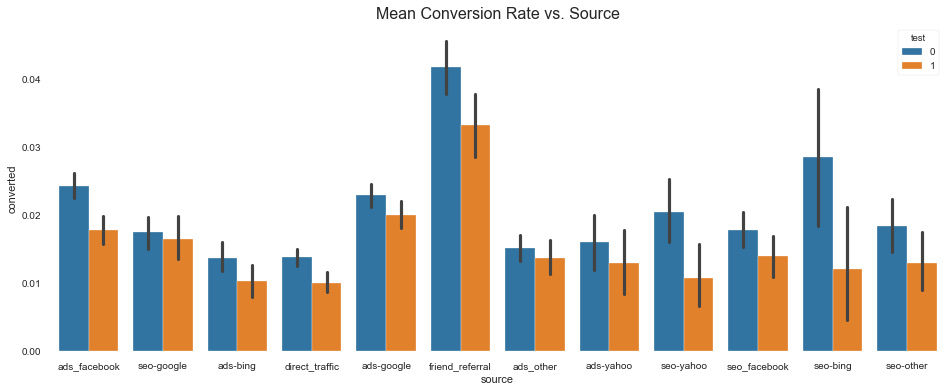

In [43]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted', hue='test', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

### conversion rate is highest through friend referral, while ads on google and facebook are close next

### I can also do a chi square test to find which feature impact most, and whether the above graph makes sense

In [44]:
colnames = ["source","device","operative_system",'price']
ch2values,pvalues = chi2(X.loc[:,colnames],X["converted"])
pd.DataFrame({'chi2_value':ch2values,'pvalue':pvalues},index = colnames).sort_values(by='pvalue')

,chi2_value,pvalue
price,109.111222,1.534304e-25
source,2.738344,9.796624e-02
device,0.980251,3.221368e-01
operative_system,0.250522,6.167076e-01


### the above values show that price and source affect conversion rates/user behaviour

In [45]:

converted_by_price= data.groupby("price")['converted'].apply(lambda s: s.value_counts(normalize=True)).unstack()
converted_by_price

,0,1
price,,
39.0,0.979813,0.020187
59.0,0.983956,0.016044


In [46]:
os_by_converted = data.groupby("converted")['operative_system'].apply(lambda s: s.value_counts(normalize=True)).unstack()
os_by_converted

,android,iOS,mac,windows
converted,,,,
0,0.254414,0.320598,0.084188,0.340800
1,0.201261,0.383193,0.109454,0.306092


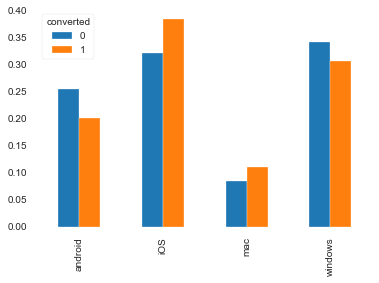

In [47]:

os_by_converted.transpose().plot(kind='bar')

### iOs drives the most conversion, with windows coming in second. 

## Actionable insights 

-- target iOS and windows users 
-- invest in more friend referral programs
-- invest in more ads through google and facebook 
-- increasing price to 59 does drop the conversion rate but not so much, so maybe plan more referral programs for these converted customers. 


# Next Steps

### 1. the third question remains unanswered - will have to look at the timestamps, convert them to a common unit first from local time, and then look at the trend of behaviours in time bins to understand when the A/B testing can be stopped

### 2. time permitting one can also train a classifier to obtain more robust results, like a decision tree. 

